# What Do Bad Movies Share?

# Import Libraries

In [1]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# NLP
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.util import ngrams
%config Completer.use_jedi = False

from itertools import chain


# set styles
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

KeyboardInterrupt: 

In [1]:
# load bad movies
df_bad = pd.read_pickle('../data/processed/trash_df.pkl')

# load rest of movies
df_rest = pd.read_csv('../data/raw/wiki_movie_plots_deduped.csv')

NameError: name 'pd' is not defined

# Utility Functions

In [9]:
def split_rows(df, column):
    return df[column].str.split('/').explode().str.strip()

In [10]:
def plot_bar(df, column, limit=None):
    
    if limit is not None:
        if isinstance(df[column][0], str):
            return split_rows(df, column).value_counts().head(limit).plot(kind='barh', figsize=(20,10), color='green')
        else:
            return df[column].explode().value_counts().plot(kind='barh', figsize=(20,10), color='green')
    else:
        return df[column].explode().value_counts().plot(kind='barh', figsize=(20,10), color='green')

# Exploring the Features

In [12]:
# inspect our dataframe
df_bad.head()

,title,kind,year,cover url,original title,cast,genres,runtimes,countries,country codes,...,bottom 100 rank,animation department,season,episode,episode of,series year,number of episodes,previous episode,next episode,imdbIndex
0,Maximum Overdrive,movie,1986.0,https://m.media-amazon.com/images/M/MV5BYzUwOW...,Maximum Overdrive (1986),Emilio Estevez as Bill Robinson / Pat Hingle a...,"[Action, Comedy, Horror, Sci-Fi]",[98],[United States],[us],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Over the Top,movie,1987.0,https://m.media-amazon.com/images/M/MV5BNzY0MD...,Over the Top (1987),Sylvester Stallone as Lincoln Hawk / Robert Lo...,"[Action, Drama, Sport]",[93],[United States],[us],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Suburban Commando,movie,1991.0,https://m.media-amazon.com/images/M/MV5BY2MwNT...,Suburban Commando (1991),Hulk Hogan as Shep Ramsey / Christopher Lloyd ...,"[Action, Comedy, Sci-Fi]",[90],[United States],[us],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No Holds Barred,movie,1989.0,https://m.media-amazon.com/images/M/MV5BNDBhYm...,No Holds Barred (1989),Hulk Hogan as Rip / Joan Severance as Samantha...,"[Action, Sport]",[93],[United States],[us],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dark Angel,tv series,2000.0,https://m.media-amazon.com/images/M/MV5BNThlYz...,Dark Angel (2000-2002),Jessica Alba as Max Guevera / ... / Michael We...,"[Action, Drama, Mystery, Sci-Fi]",[60],[United States],[us],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      178 non-null    object 
 1   kind                       178 non-null    object 
 2   year                       177 non-null    float64
 3   cover url                  178 non-null    object 
 4   original title             178 non-null    object 
 5   cast                       177 non-null    object 
 6   genres                     178 non-null    object 
 7   runtimes                   170 non-null    object 
 8   countries                  170 non-null    object 
 9   country codes              170 non-null    object 
 10  language codes             169 non-null    object 
 11  color info                 169 non-null    object 
 12  aspect ratio               141 non-null    object 
 13  sound mix                  136 non-null    object 

In [14]:
df_bad.set_index('title',inplace=True)

In [15]:
df_bad.metascore.isnull().value_counts()

True     131
False     47
Name: metascore, dtype: int64

# Visualisations

## What Are The Top Genres?

In [16]:
df_bad.genres.explode().value_counts(normalize=True)

Action         0.158228
Thriller       0.158228
Comedy         0.139241
Horror         0.107595
Drama          0.099156
Sci-Fi         0.086498
Crime          0.063291
Adventure      0.040084
Fantasy        0.037975
Sport          0.023207
Romance        0.021097
Mystery        0.016878
Music          0.008439
Family         0.008439
Short          0.004219
Documentary    0.004219
Western        0.004219
History        0.004219
Talk-Show      0.004219
War            0.002110
Biography      0.002110
News           0.002110
Musical        0.002110
Film-Noir      0.002110
Name: genres, dtype: float64

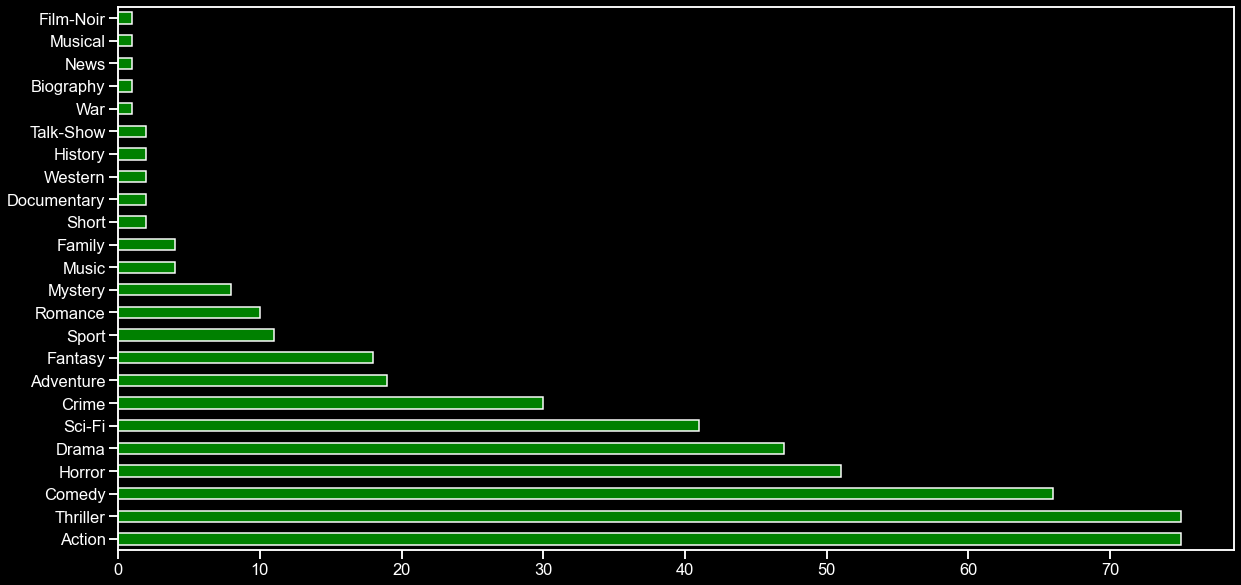

In [17]:
# genre bar plot
plot_bar(df_bad, 'genres');

Thriller, Action and Comedy take up just under **half** of all the movies in the collection.

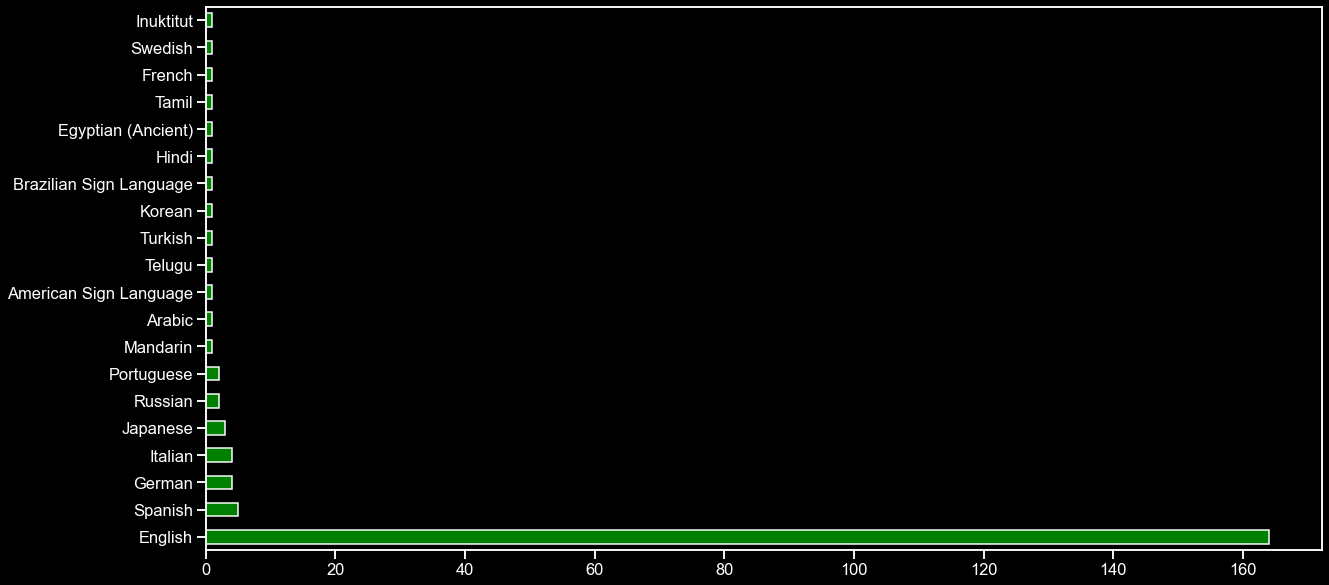

In [19]:
plot_bar(df_bad, 'languages');

## Which Country Was Most Popular?

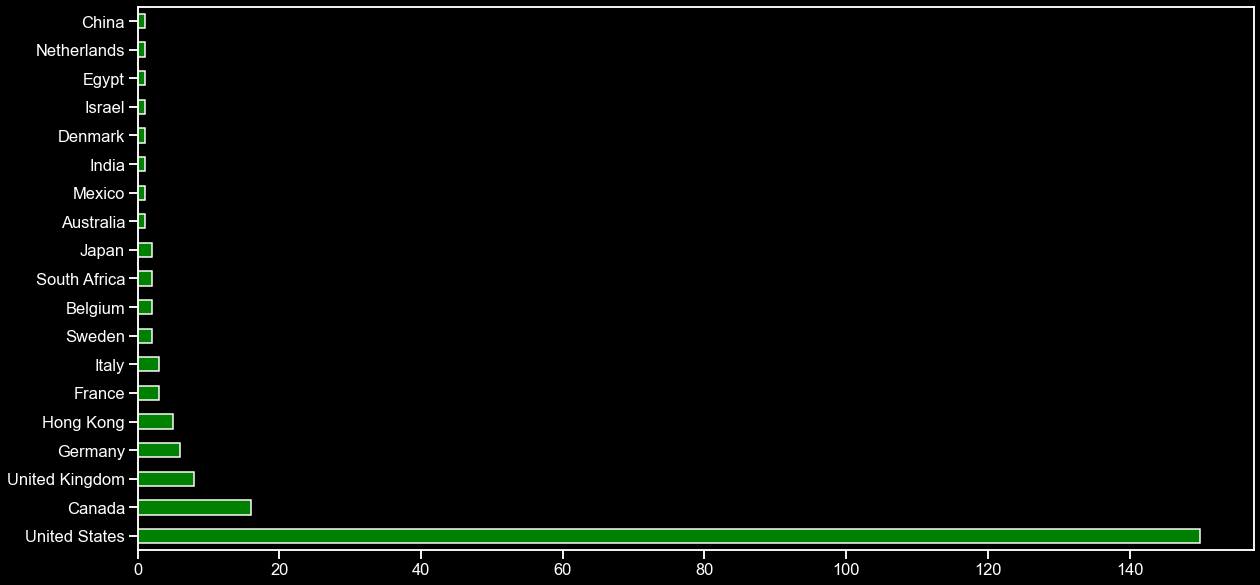

In [20]:
plot_bar(df_bad, 'countries');

`Unites States` takes the cake with a whopping $140$ plus. This isn't a suprise with America being home to Hollywood. 

## What was the Average Rating?

In [21]:
df_bad.rating.mean()

4.929696969696971

The average rating is below $5$. Ouch. This also doesn't come as a suprise as this list is comprised of hand-picked 'bad' movies. However it is interesting that it is only just below 'average' on a scale of $10$. 

## What About The Sound Mix? 

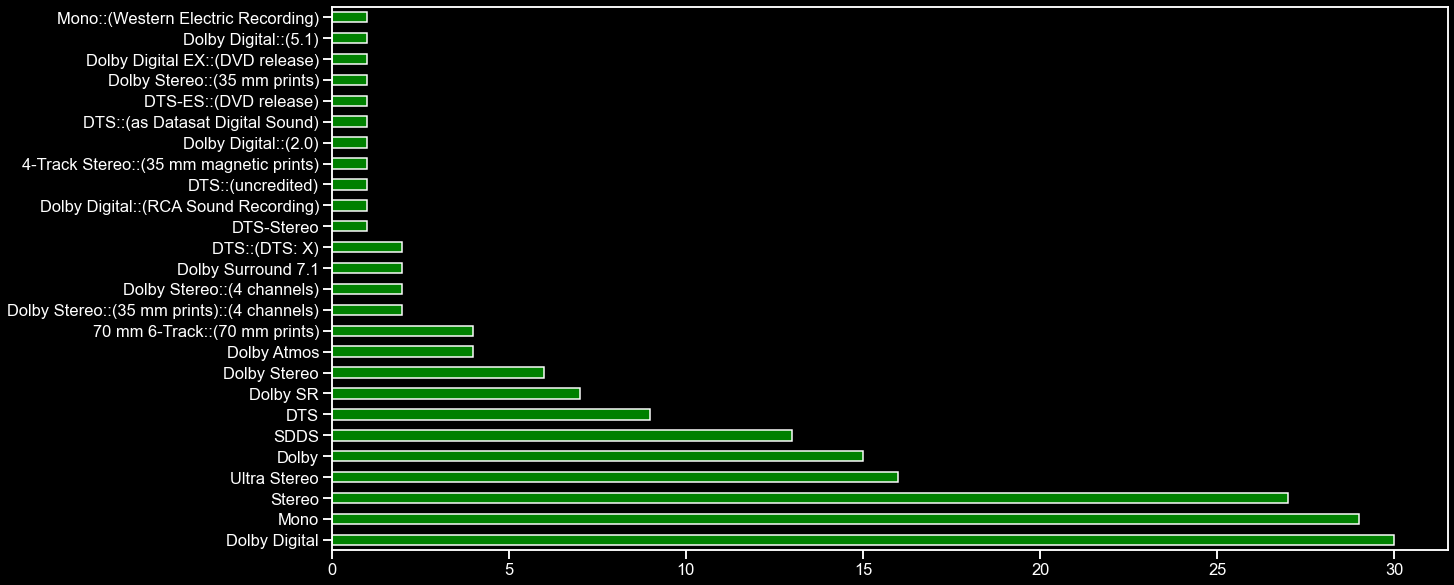

In [22]:
plot_bar(df_bad, 'sound mix');

Dolby Digital and Mono dominate the sound mix.

In [24]:
df_bad.writers.str.split('/').explode().str.strip().value_counts().head(10)

                        152
Lloyd Kaufman             8
Andy Sidaris              4
Joe Ritter                4
Gay Partington Terry      3
Stephen King              3
Doug Campbell             3
Thunder Levin             3
Jeffrey Boam              3
Charles Band              3
Name: writers, dtype: int64

In [25]:
df_bad.cinematographers.value_counts().head(10)

Mark Irwin                           3
Howard Wexler                        3
Robert Ballo                         2
Jan de Bont                          2
Levie Isaacks                        2
Lloyd Kaufman / James A. Lebovitz    2
Adam Sliwinski                       2
João Fernandes                       2
Glen MacPherson                      2
David Worth                          2
Name: cinematographers, dtype: int64

In [27]:
df_bad['script department'].value_counts().head(10)

Marion Tumen                            2
Diane Collins                           2
Mark Torgl                              2
Mark S. Thomas                          2
April McQuarrie                         2
Jesse Long                              2
Sarah Schultz                           2
Barbara Amato                           1
Leslie O'Neil                           1
Kennedy Del Toro / Emanuela Szumilas    1
Name: script department, dtype: int64

In [28]:
top_10 = list(df_bad['script department'].value_counts().head(10).index)

In [30]:
df_bad[df_bad['script department'].isin(top_10)]

,kind,year,cover url,original title,cast,genres,runtimes,countries,country codes,language codes,...,bottom 100 rank,animation department,season,episode,episode of,series year,number of episodes,previous episode,next episode,imdbIndex
title,,,,,,,,,,,,,,,,,,,,,
The Gingerdead Man,movie,2005.0,https://m.media-amazon.com/images/M/MV5BMTgyNT...,The Gingerdead Man (2005),Gary Busey as Millard Findlemeyer / Robin Sydn...,"[Comedy, Fantasy, Horror]",[70],[United States],[us],[en],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sharknado,tv movie,2013.0,https://m.media-amazon.com/images/M/MV5BODcwZW...,Sharknado (2013),Ian Ziering as Fin Shepard / Tara Reid as Apri...,"[Action, Adventure, Comedy, Horror, Sci-Fi, Th...",[86],[United States],[us],[en],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zombeavers,movie,2014.0,https://m.media-amazon.com/images/M/MV5BNTMzMz...,Zombeavers (2014),Rachel Melvin as Mary / Cortney Palm as Zoe / ...,"[Comedy, Horror]",[77],[United States],[us],[en],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hell Comes to Frogtown,movie,1988.0,https://m.media-amazon.com/images/M/MV5BZWZjYT...,Hell Comes to Frogtown (1988),Julius LeFlore as Squidlips / RCB as The Poor ...,"[Action, Comedy, Sci-Fi]",[86],[United States],[us],[en],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Troll 2,movie,1990.0,https://m.media-amazon.com/images/M/MV5BZmQ4Mz...,Troll 2 (1990),Michael Paul Stephenson as Joshua Waits / Geor...,"[Comedy, Fantasy, Horror]",[95],[Italy],[it],[en],...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cool as Ice,movie,1991.0,https://m.media-amazon.com/images/M/MV5BNzU4Mz...,Cool as Ice (1991),Naomi Campbell as Singer at First Club / Vanil...,"[Comedy, Drama, Music, Romance]",[91],[United States],[us],[en],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Toxic Avenger,movie,1984.0,https://m.media-amazon.com/images/M/MV5BNzViNm...,The Toxic Avenger (1984),Andree Maranda as Sara / Mitch Cohen as The To...,"[Action, Comedy, Horror, Sci-Fi]",[82],[United States],[us],[en],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Toxic Avenger,movie,1984.0,https://m.media-amazon.com/images/M/MV5BNzViNm...,The Toxic Avenger (1984),Andree Maranda as Sara / Mitch Cohen as The To...,"[Action, Comedy, Horror, Sci-Fi]",[82],[United States],[us],[en],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Society,movie,1989.0,https://m.media-amazon.com/images/M/MV5BYzE3ND...,Society (1989),Billy Warlock as Bill Whitney / Concetta D'Agn...,"[Comedy, Horror]",[99],"[Japan, United States]","[jp, us]",[en],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


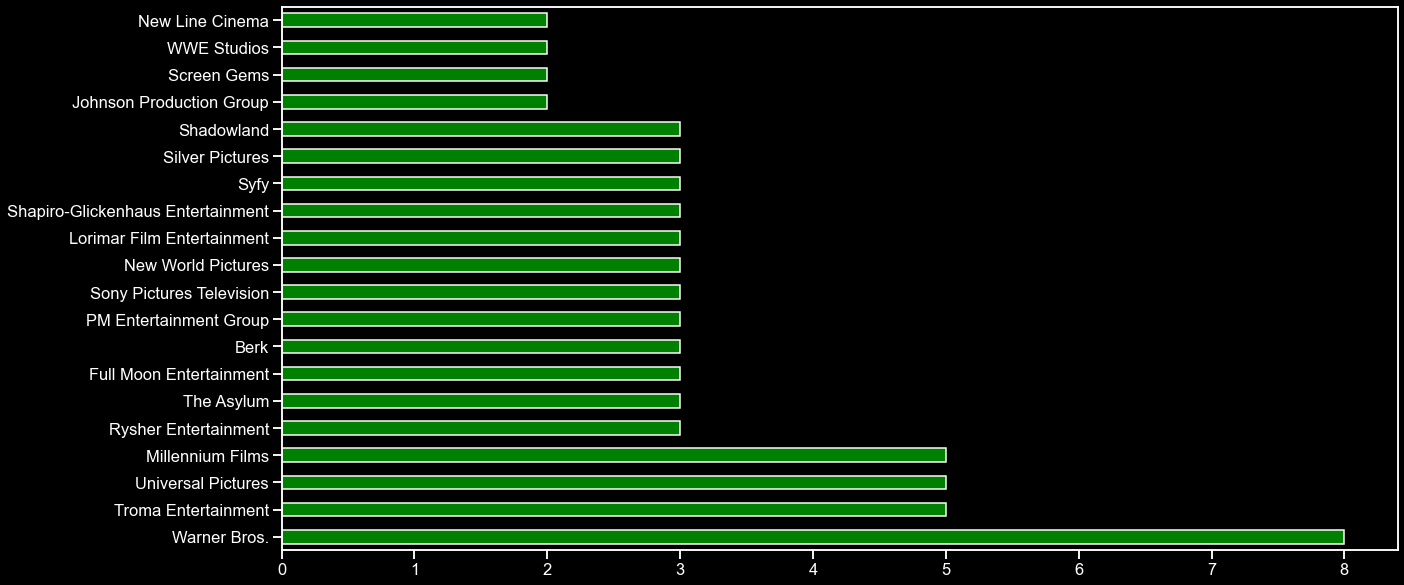

In [31]:
plot_bar(df_bad, 'production companies', limit=20);

# Natural Language Processing 

## Pre-processing
### Tokenization

**Tokenization** is the process of breaking down sentences into smaller *'tokens'*. In our case we are splitting the text based on words. Similar to using `\w+` in regular expression syntax. Note we also make the words lowecase.

#### Example

In [32]:
text = df_bad['plot'][0][1]

tokens = word_tokenize(text.lower())
print(tokens)

['when', 'earth', 'passes', 'through', 'the', 'tail', 'of', 'rea-m', 'rogue', 'comet', ',', 'the', 'machines', 'come', 'to', 'life', 'and', 'start', 'to', 'kill', 'mankind', '.', 'a', 'group', 'of', 'survivors', 'is', 'under', 'siege', 'from', 'fierce', 'trucks', 'at', 'the', 'dixie', 'boy', 'truck', 'stop', 'gas', 'station', 'and', 'they', 'have', 'to', 'fight', 'to', 'survive', '.', ':', ':claudio', 'carvalho', ',', 'rio', 'de', 'janeiro', ',', 'brazil']


To create a bag of words the `Counter` class from the collections module is useful in creating a dictionary with the keys as our words and the values as the frequency of each word.

In [33]:
bag_of_words = Counter(tokens)
bag_of_words

Counter({'when': 1,
         'earth': 1,
         'passes': 1,
         'through': 1,
         'the': 3,
         'tail': 1,
         'of': 2,
         'rea-m': 1,
         'rogue': 1,
         'comet': 1,
         ',': 3,
         'machines': 1,
         'come': 1,
         'to': 4,
         'life': 1,
         'and': 2,
         'start': 1,
         'kill': 1,
         'mankind': 1,
         '.': 2,
         'a': 1,
         'group': 1,
         'survivors': 1,
         'is': 1,
         'under': 1,
         'siege': 1,
         'from': 1,
         'fierce': 1,
         'trucks': 1,
         'at': 1,
         'dixie': 1,
         'boy': 1,
         'truck': 1,
         'stop': 1,
         'gas': 1,
         'station': 1,
         'they': 1,
         'have': 1,
         'fight': 1,
         'survive': 1,
         ':': 1,
         ':claudio': 1,
         'carvalho': 1,
         'rio': 1,
         'de': 1,
         'janeiro': 1,
         'brazil': 1})

#### Creating a bag of words for ALL the plots

In [34]:
# create list of all plots

plots = list(df_bad['plot'].explode())

# remove nans
for x in plots:
    if isinstance(x, float):
        plots.remove(x)

In [35]:
# Create giant string of all plots stitched together.

all_plots = ""

for plot in plots:
    all_plots += plot

In [36]:
masterTokens = word_tokenize(all_plots.lower())

In [37]:
# remove stop words and punctuation

allPlotsClean = [word for word in masterTokens if word not in set(stopwords.words('english'))]
allPlotsClean = [word for word in allPlotsClean if word.isalpha()]

In [38]:
totalWordCount = Counter(allPlotsClean)

In [39]:
# Create dataframe of word distribution

word_dist = pd.DataFrame.from_dict(totalWordCount, orient='index').reset_index()
word_dist.columns = ['word', 'frequency']
word_dist = word_dist.sort_values(by='frequency', ascending=False)
word_dist.set_index('word')

,frequency
word,
one,97
qv,74
life,70
man,62
new,53
...,...
lunatic,1
infiltrates,1
crooks,1


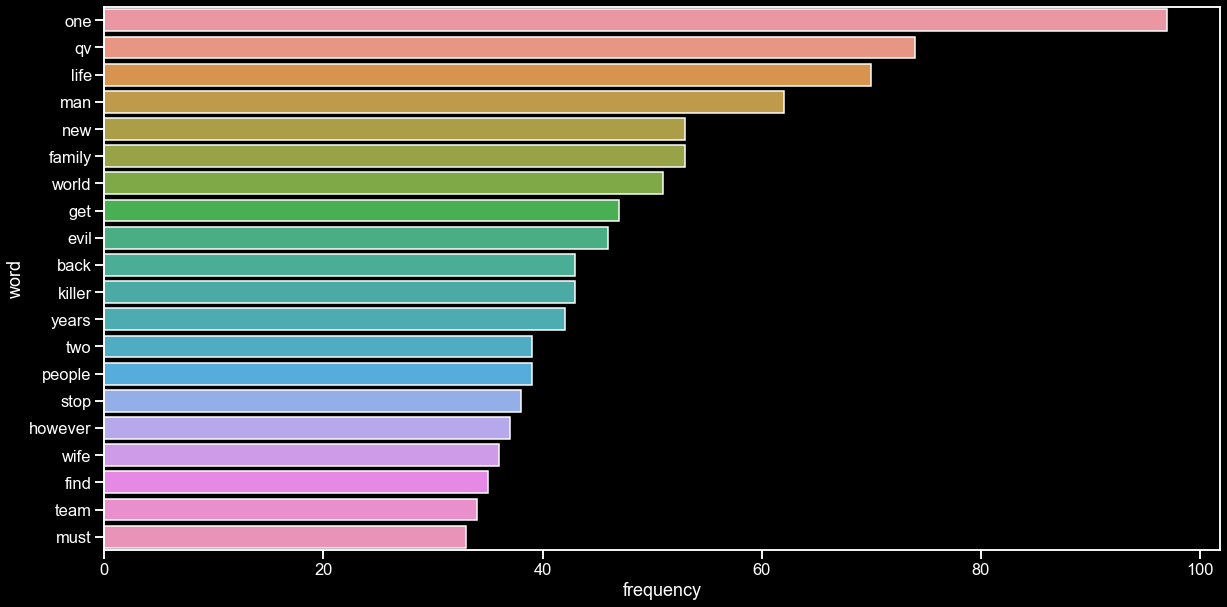

In [40]:
# word distribution

top20Words = word_dist.head(20)

plt.figure(figsize=(20,10))

ax = sns.barplot(data=top20Words, x='frequency', y='word')

N-grams are n grouped together words. `nltk` has a handy library for returning n-grams. These representations of the text can be useful in extracting meaning from groups of words rather than analysing them in isolation.

In [44]:
for ngrams in ngrams(tokens, 2):
    print(ngrams)

('when', 'earth')
('earth', 'passes')
('passes', 'through')
('through', 'the')
('the', 'tail')
('tail', 'of')
('of', 'rea-m')
('rea-m', 'rogue')
('rogue', 'comet')
('comet', ',')
(',', 'the')
('the', 'machines')
('machines', 'come')
('come', 'to')
('to', 'life')
('life', 'and')
('and', 'start')
('start', 'to')
('to', 'kill')
('kill', 'mankind')
('mankind', '.')
('.', 'a')
('a', 'group')
('group', 'of')
('of', 'survivors')
('survivors', 'is')
('is', 'under')
('under', 'siege')
('siege', 'from')
('from', 'fierce')
('fierce', 'trucks')
('trucks', 'at')
('at', 'the')
('the', 'dixie')
('dixie', 'boy')
('boy', 'truck')
('truck', 'stop')
('stop', 'gas')
('gas', 'station')
('station', 'and')
('and', 'they')
('they', 'have')
('have', 'to')
('to', 'fight')
('fight', 'to')
('to', 'survive')
('survive', '.')
('.', ':')
(':', ':claudio')
(':claudio', 'carvalho')
('carvalho', ',')
(',', 'rio')
('rio', 'de')
('de', 'janeiro')
('janeiro', ',')
(',', 'brazil')


Stop words are common words in any language that occur with a high frequency by carry much less substansive information about the meaning of a sentence.

## Sentiment Analysis

We can use a rules based system to evaluate the sentiment of our plots. `VADER` (Valence Aware Dictionary for Sentiment Reasoning) by Hutto and Gilber at GA Tech. This contains a lexicon which contains scores for various tokens. 

In [45]:
sa = SentimentIntensityAnalyzer()

In [47]:
corpus_max_overdrive = df_bad['plot'][0]

print('Maximum Overdrive Plot Sentiments........')

for plots in corpus_max_overdrive:
    
    scores = sa.polarity_scores(text)
    print()
    print('{:+}: {}'.format(scores['compound'], plots))

Maximum Overdrive Plot Sentiments........

-0.8591: A group of people try to survive when machines start to come alive and become homicidal.::Kenneth Chisholm

-0.8591: When Earth passes through the tail of Rea-M rogue comet, the machines come to life and start to kill mankind. A group of survivors is under siege from fierce trucks at the Dixie Boy truck stop gas station and they have to fight to survive.::Claudio Carvalho, Rio de Janeiro, Brazil

-0.8591: For 8 days in 1986, the earth passed through the tail of a mysterious Rhea-M rogue comet. During that time, machines on earth suddenly come to life and terrorize their human creators. A small group of people in a truck stop, surrounded by "alive" semi-trailers, set out to stop the machines before the machines stop them.::Matt McQuillan <mjment@hotmail.com>

-0.8591: When a mysterious comet passes close within the Earth, machines all over the World come alive and go on homicidal rampages. A group of people in a desolate Truck Stop are

---
Wow seems like Maximum Overdrive has a strong negative sentiment. I have seen the movie so I know this is true, but lets analyse the genre to see if this evaluation matches.

In [49]:
genre = df_bad.iloc[0]['genres']

Seemingly, according to `VADER` the most appropriate genre would be all but the `Comedy` label. Unless this was put in ironically of course. 
Lets check out movie I know is meant to be a comedy and check the sentiment of that to see how VADER fares.

In [50]:
comedy = df_bad['plot'].loc[df_bad.index == "Going Overboard"][0]

for plots in comedy:
    scores = sa.polarity_scores(text)
    print()
    print('{:+}: {}'.format(scores['compound'], plots))


-0.8591: A struggling young comedian takes a menial job on a cruise ship hoping for his big chance to make it in the world of cruise-ship comedy.::Anonymous

-0.8591: Shecky Moskowitz, a deservedly struggling young comedian, lands a menial job on the cruise ship that's holding the Miss Universe pageant. The Big Man On Deck for this voyage is Dickie Diamond, the ship's comedian and all-around ladies' man. As an assorted array of thugs, Panamanian mercenaries, and terrorists try to storm the ship, Shecky hopes for one big chance to prove himself and enter the exciting world of cruise-ship comedy.::Jean-Marc Rocher <rocher@fiberbit.net>


---
Ah here it seems that the plot has a greater positive sentiment once we picked out a movie with `Comedy` in its genre.

# Classifying Bad Movies

We have explored the bad movies in our corpus. 